# Data Science Ethics

## Introduction to bias in ML

Machine learning models are increasingly used in high-stakes decisions, from credit scoring and hiring to medical diagnoses and criminal sentencing. However, these models can inadvertently perpetuate, amplify, or create bias if not carefully developed and monitored. We'll begin with a case study to set the stage for our discussion on bias and fairness in machine learning.

<img src='img/dalle1.jpg' width="30%">

Source: Image created by openAI

Imagine a job recruitment platform that uses machine learning algorithms to target job advertisements to potential applicants. An investigation reveals that the algorithm disproportionately shows high-paying job ads for technical roles to men more than women. This pattern emerges not from explicit programming but from the algorithm learning from historical data, which reflects a pre-existing gender imbalance in the tech industry. (https://globalnews.ca/news/4532172/amazon-jobs-ai-bias/)

This case highlights "algorithmic bias," where the model's predictions or decisions are systematically prejudiced due to erroneous assumptions in the machine learning process. It raises questions about fairness: What does it mean for an algorithm to be fair, and how can we measure and ensure fairness?

## Sources of bias in machine learning


### Data Bias

If the training data is unrepresentative or contains historical prejudices, models can inherit these biases. For example, if a dataset for facial recognition has mostly light-skinned individuals, the model may perform poorly on darker-skinned faces.

<img src='img/dalle2.jpg' width="30%">

Source: Image created by openAI

In a [report](https://nvlpubs.nist.gov/nistpubs/ir/2019/NIST.IR.8280.pdf#page=5) by the National Institute of Standards and Technology, a study covering 189 facial recognition algorithms—which represent a significant portion of the industry—revealed prevalent biases. The study showed that these technologies incorrectly recognized Black and Asian faces with a frequency that was 10 to 100 times higher compared to white faces. Furthermore, the report indicated a higher rate of misidentification for women than for men, with Black women being especially susceptible to this bias. Additionally, when employing images used by U.S. law enforcement, the algorithms were prone to falsely recognize Native American individuals more frequently than those from other demographic groups.


### Algorithmic Bias
Sometimes, the algorithm's design can give undue weight to certain features that correlate with sensitive attributes like race or gender, leading to biased outcomes.

<img src='img/dalle3.jpg' width="30%">

Source: Image created by openAI

Algorithmic bias can manifest in various domains, one notable example being the COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) system used in the US criminal justice system. COMPAS is a risk assessment tool designed to help judges make decisions about which defendants are likely to reoffend.

An [investigation](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) by ProPublica in 2016 revealed that the COMPAS algorithm disproportionately misclassified Black defendants as having a higher risk of recidivism compared to white defendants. Specifically, the study found that Black defendants were nearly twice as likely to be labeled a higher risk yet not actually reoffend. It also showed that white defendants were more likely to be labeled lower risk but go on to commit other crimes.

This discrepancy highlights how algorithmic decision-making can reflect and amplify societal biases, raising concerns about fairness and the implications of relying on such tools in the justice system.



### Confirmation Bias

<img src='img/dalle4.jpg' width="30%">

Source: Image created by openAI

This occurs when the model's predictions reinforce the pre-existing beliefs encoded in the data, perpetuating a cycle of bias.

A clear example of confirmation bias in AI can be seen in [news recommendation algorithms](https://dl.acm.org/doi/abs/10.1145/3565472.3595619) used by social media platforms and news aggregation websites. These algorithms typically personalize content based on a user's past interactions, preferences, and browsing history. If a user frequently engages with articles from a particular political viewpoint, the algorithm learns to prioritize content reflecting that viewpoint. Over time, the user is increasingly presented with news and opinions that align with their initial beliefs, potentially creating an "echo chamber" or "filter bubble." This effect can limit exposure to diverse perspectives and reinforce pre-existing biases, making users less likely to encounter challenging or contradictory information.

Such confirmation bias in AI-driven content recommendation systems can contribute to increased polarization and division within society. It exemplifies how AI, without careful design to promote diversity and exposure to a wide range of viewpoints, can inadvertently magnify human biases.


### Measurement Bias
When the tools or processes used to collect data are biased, they can distort the representation of reality within the dataset.

<img src='img/dalle5.jpg' width="30%">

Source: Image created by openAI

A notable example of measurement bias can be found in [health monitoring wearable devices](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8477341/#:~:text=Inaccurate%20signal%20detection%20and%20validation,about%20the%20effectiveness%20of%20monitoring.), such as fitness trackers and smartwatches, designed to measure various health metrics like heart rate, sleep patterns, and physical activity levels. These devices rely on sensors and algorithms to collect and interpret data. However, research has shown that the accuracy of these measurements can vary significantly across different skin tones.

In particular, the optical heart rate sensors used in many wearables, which rely on green LED lights to measure heart rate, have been found to be less accurate on darker skin tones. The absorption and reflection of light differ across skin tones, and since many of these devices were predominantly tested on lighter skin tones during their development, the algorithms may not perform equally well for all users. This discrepancy introduces measurement bias, as the data used to train and calibrate these health algorithms does not equally represent all potential users, leading to potential inaccuracies in health assessments for individuals with darker skin.

This example of measurement bias highlights the critical importance of inclusive and diverse data collection practices in the development of AI technologies, especially those used in health and wellness applications, to ensure accuracy and fairness for all users.

## Common fairness metrics

### Demographic Parity
**Definition**: Demographic Parity compares the rate of positive predictions across different groups without considering the actual labels.

**Utility**: This metric is useful when the dataset is known to have biases, as it aims to ensure that decisions (e.g., loan approvals) are made at the same rate for each group.

**Limitations**: It ignores the true labels, losing valuable information. Moreover, the metric simplifies the distribution of predictions across groups, which complicates its use for optimizing fairness.


Example Calculation:

Suppose you have two groups, A and B, in your dataset.
After making predictions, you find:
- 60 out of 100 individuals from Group A received positive predictions (e.g., loan approved).
- 40 out of 100 individuals from Group B received positive predictions.

Demographic Parity is not achieved since the positive prediction rates are not equal (60% for Group A vs. 40% for Group B).


### Equalized Odds
**Definition**: Equalized Odds compares both the True Positive Rates (TPR) and False Positive Rates (FPR) between different groups, ensuring fairness in both correctly and incorrectly predicted positive outcomes.

**Utility**: Suitable when historical data is reliable and both types of correct and incorrect positive predictions are equally important.

**Limitations**: Historical biases can invalidate the original labels' usefulness. Also, a significant class imbalance can exaggerate statistical problems, especially in smaller sensitive groups.

Example Calculation:

Considering the same groups, A and B, and their true and false positive outcomes:
- Group A: TPR = 80%, FPR = 20%
- Group B: TPR = 70%, FPR = 25%

Equalized Odds is not achieved since both TPR and FPR are not equal across groups (80% vs. 70% for TPR and 20% vs. 25% for FPR).


### Equal Opportunity
**Definition**: Equal Opportunity specifically focuses on the equality of True Positive Rates (TPR) across different groups.

**Utility**: This metric is beneficial when false positives are less concerning than false negatives, making it critical to fairly identify true positives across all groups.

**Limitations**: Like Equalized Odds, it suffers in the presence of historical biases and class imbalances, affecting its reliability for groups with fewer members.

Example Calculation:

Using the same scenario with groups A and B, focusing solely on TPR:
- Group A: TPR = 80%
- Group B: TPR = 70%

Equal Opportunity is not achieved due to the disparity in TPR between Group A and Group B (80% vs. 70%).

## Let's practice

Select all statements that are TRUE:

A. **Equal Opportunity** ensures that the prediction accuracy is the same for all demographic groups.

B. **Demographic Parity** implies that the positive prediction rate should be the same across different groups defined by sensitive attributes.

C. A model that achieves **Equalized Odds** will also automatically satisfy **Demographic Parity**.

D. **Equal Opportunity** focuses exclusively on ensuring that the False Positive Rate (FPR) is equal across different demographic groups.

E. The **Selection Rate** is a fairness metric that measures the proportion of positive outcomes for a specific group, and it is used to assess the fairness of a model in terms of Demographic Parity.

```{admonition} Solutions!
:class: dropdown

A. False. Equal Opportunity focuses specifically on ensuring that the True Positive Rate (TPR) is equal across groups, not the overall prediction accuracy.

B. True. Demographic Parity focuses on ensuring that the decision or positive prediction rate is the same across groups, regardless of the actual outcome rates within those groups.

C. False. Equalized Odds and Demographic Parity are distinct fairness metrics with different criteria. A model can satisfy Equalized Odds without necessarily achieving Demographic Parity.

D. False. Equal Opportunity specifically targets equality in the True Positive Rate (TPR) across different groups, not the False Positive Rate.

E. True. The Selection Rate measures how often individuals within a group are predicted to have positive outcomes and is key to assessing Demographic Parity.
```

## Implementation with `fairlearn`

Fairlearn is an open-source, community-driven project to help data scientists improve fairness of AI systems. https://fairlearn.org/

If you haven't installed fairlearn, you can run the following code in a new code cell.

```python
! conda install fairlearn
```

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score

from fairlearn.metrics import MetricFrame, false_positive_rate, false_negative_rate,count, selection_rate
from fairlearn.datasets import fetch_adult
from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
from fairlearn.reductions import DemographicParity

import pandas as pd
import json

Let's import the ACSIncome dataset. 

From [fairlearn documentation](https://fairlearn.org/main/user_guide/datasets/acs_income.html#introduction): 

"The ACSIncome dataset is one of five datasets created by Ding et al. [1] as an improved alternative to the popular UCI Adult dataset. [2] Briefly, the UCI Adult dataset is commonly used as a benchmark dataset when comparing different algorithmic fairness interventions. ACSIncome offers a few improvements, such as providing more datapoints (1,664,500 vs. 48,842) and more recent data (2018 vs. 1994). Further, the binary labels in the UCI Adult dataset indicate whether an individual earned more than $50k US dollars in that year"

In [16]:
data = fetch_adult(as_frame=True)
X = data.data
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


After importing the data, let's create our target column (binary) as whether the annual income is larger than $50,000.

We also define the sensitive feature (e.g., sex) that we want to examine the fairness

In [17]:
# Define the target and sensitive features
y = (data.target == ">50K") * 1
sensitive_features = df["sex"]


We then split the data in training and test set, as well as the associated sensitive feature (e.g. sex)

In [18]:
# Split the data into a training and test set

(X_train, X_test, y_train, y_test, A_train, A_test) = train_test_split(
    X, y, sensitive_features, test_size=0.3, random_state=12345, stratify=target_labels
)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

A_train = A_train.reset_index(drop=True)
A_test = A_test.reset_index(drop=True)

We then build a pipeline and fit a SVC model

In [19]:
numeric_transformer = Pipeline(
    steps=[
        ("impute", SimpleImputer()),
        ("scaler", StandardScaler()),
    ]
)
categorical_transformer = Pipeline(
    [
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore")),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude="category")),
        ("cat", categorical_transformer, selector(dtype_include="category")),
    ]
)

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "classifier",
            LogisticRegression(solver='liblinear'),
        ),
    ]
)

In [20]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x179c262f0>),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x179c27490>)])),
                ('classifier', LogisticRegression(solver='liblinear'))])

We get the prediction on testing set

In [21]:
y_pred = pipeline.predict(X_test)

The first step to examine model fairness is to plot the evaluation metrics by sub-groups in the sensitive feature 

array([[<Axes: title={'center': 'accuracy'}, xlabel='sex'>,
        <Axes: title={'center': 'precision'}, xlabel='sex'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='sex'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='sex'>,
        <Axes: title={'center': 'selection rate'}, xlabel='sex'>,
        <Axes: title={'center': 'count'}, xlabel='sex'>],
       [<Axes: xlabel='sex'>, <Axes: xlabel='sex'>, <Axes: xlabel='sex'>]],
      dtype=object)

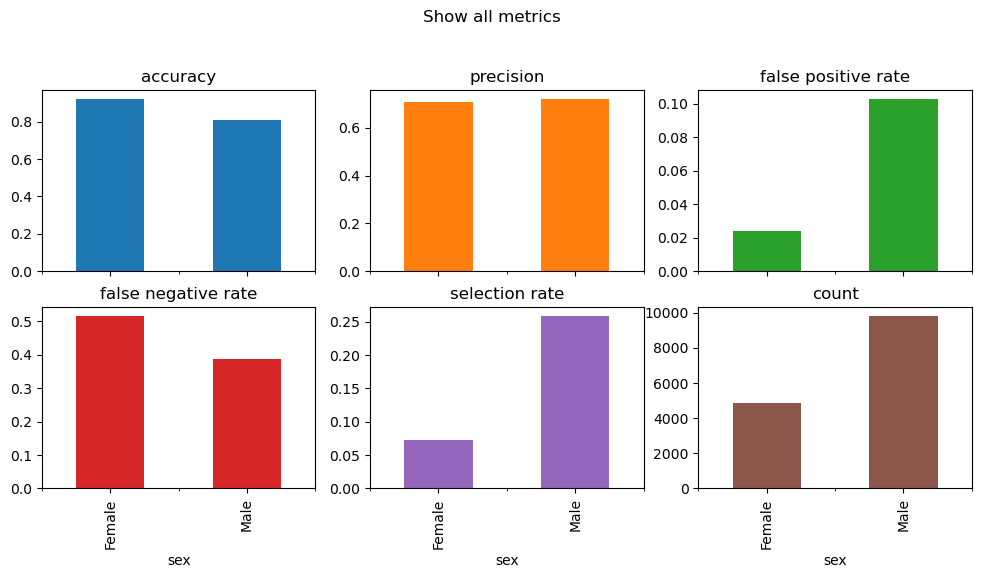

In [22]:
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
    "count": count,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=A_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

As we can see from the plots above, there's a wide disparity in the selection rate, false negative rate, and false positive rate between female and male. 
- Selection rate: In particular, the model predicted positive outcome (i.e., annual income > $50,000) for more male then female. 
- False positive rate: In favor of male, that means the model tends to predict male as having annual income > $50,000 even though it will get it wrong more than female
- False negative rate: Female are overlooked more than male. That means there were more female that actually have income > $50,000 but the model failed to identify them.

Below are examples to calculate the `demographic parity ratio` and `equalized odds ratio`.

- **Demographic parity ratio**: Ratio of selection rates between smallest and largest groups. Return type is a decimal value. A ratio of 1 means all groups have same selection rate.

- **Equalized odds ratio**: The equalized odds ratio of 1 means that all groups have the same true positive, true negative, false positive, and false negative rates.

In [23]:
m_dpr = demographic_parity_ratio(y_test, y_pred, sensitive_features=A_test)
m_eqo = equalized_odds_ratio(y_test, y_pred, sensitive_features=A_test)
print(f'Value of demographic parity ratio: {round(m_dpr, 2)}')
print(f'Value of equal odds ratio: {round(m_eqo, 2)}')

Value of demographic parity ratio: 0.28
Value of equal odds ratio: 0.23


## Strategies to mitigate bias in ML models

There are many bias mitigation techniques including pre-processing, post-processing, or reductions (https://fairlearn.org/v0.10/user_guide/mitigation/index.html). One thing which should always be remembered: all the algorithms herein will provide mathematical guarantees as to how close they can drive some unfairness metric to zero. However, this does not mean that the results are fair.

Below is an example of post-processing bias mitigation technique

From the [fairlearn documentation](https://fairlearn.org/v0.10/user_guide/mitigation/postprocessing.html):

"ThresholdOptimizer is based on the paper Equality of Opportunity in Supervised Learning [1]. Unlike other mitigation techniques ThresholdOptimizer is built to satisfy the specified fairness criteria exactly and with no remaining disparity. In many cases this comes at the expense of performance, for example, with significantly lower accuracy. Regardless, it provides an interesting data point for comparison with other models. Importantly, ThresholdOptimizer requires the sensitive features to be available at deployment time (i.e., for the predict method).

For each sensitive feature value, ThresholdOptimizer creates separate thresholds and applies them to the predictions of the user-provided estimator. To decide on the thresholds it generates all possible thresholds and selects the best combination in terms of the objective and the fairness constraints"

In [24]:
threshold_optimizer = ThresholdOptimizer(
    estimator=pipeline,
    constraints="demographic_parity", # other options: "demographic_parity", "false_positive_rate_parity", "false_negative_rate_parity"
    predict_method="predict_proba",
    prefit=False,
)

In [25]:
threshold_optimizer.fit(X_train, y_train, sensitive_features=A_train)

ThresholdOptimizer(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x179c262f0>),
                                                                              ('cat',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x179c27490>)])),
                                             ('classifier',
                                              LogisticRegression(solver='liblinear'))]),
                   predict_method='predict_proba')

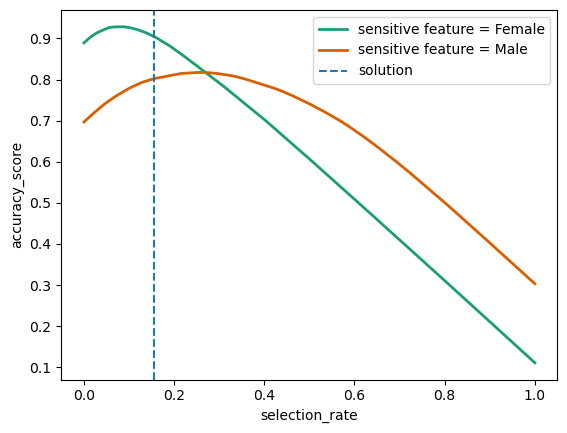

In [26]:
y_pred_opt = threshold_optimizer.predict(X_test, sensitive_features=A_test)

plot_threshold_optimizer(threshold_optimizer)

Re-evaluate fairness metrics after using ThresholdOptimizer

array([[<Axes: title={'center': 'accuracy'}, xlabel='sex'>,
        <Axes: title={'center': 'precision'}, xlabel='sex'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='sex'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='sex'>,
        <Axes: title={'center': 'selection rate'}, xlabel='sex'>,
        <Axes: title={'center': 'count'}, xlabel='sex'>],
       [<Axes: xlabel='sex'>, <Axes: xlabel='sex'>, <Axes: xlabel='sex'>]],
      dtype=object)

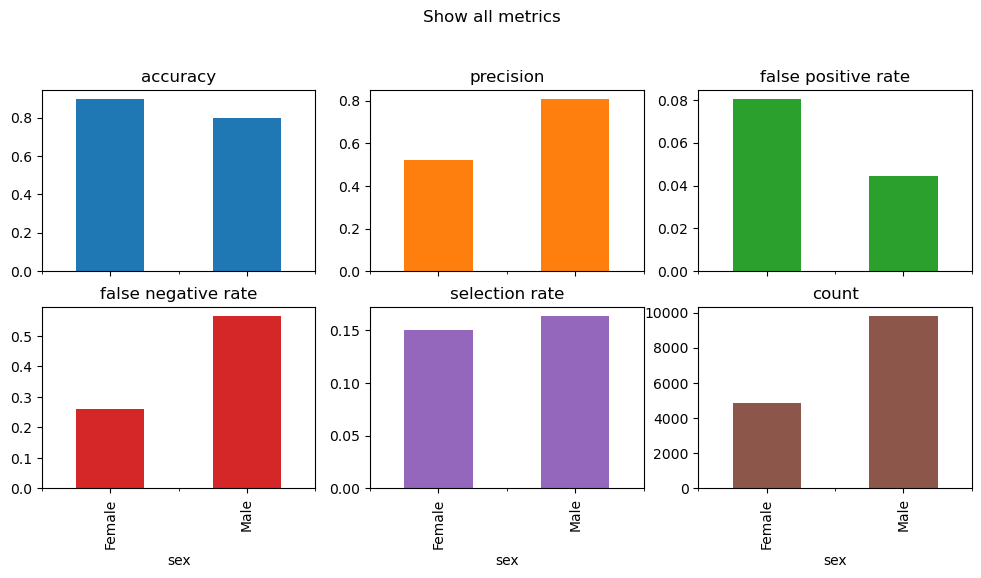

In [27]:
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
    "count": count,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred_opt, sensitive_features=A_test
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

In [28]:
m_dpr_opt = demographic_parity_ratio(y_test, y_pred_opt, sensitive_features=A_test)
m_eqo_opt = equalized_odds_ratio(y_test, y_pred_opt, sensitive_features=A_test)
print(f'Value of demographic parity ratio (after post-processing): {round(m_dpr_opt, 2)}')
print(f'Value of equal odds ratio (after post-processing): {round(m_eqo_opt, 2)}') 

Value of demographic parity ratio (after post-processing): 0.92
Value of equal odds ratio (after post-processing): 0.55


## Let's practice

Using the same ASCIncome dataset, examine the model bias with respect to race as the sensitive feature.

- Use a decision tree with a max_depth of 10
- Plot the fairness metrics by race
- Briefly comment on your intepretation of the plots
- Use `ThresholdOptimizer` to improve the fairness with respect to selection rate
- Re-evaluate model fairness after using `ThresholdOptimizer`